# Read Data

In [1]:
import os
import matplotlib.pyplot as plt

import tensorflow as tf
import re
import string
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras import losses

In [2]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [3]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.3.0
Eager execution: True


In [4]:
url = "http://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz"

dataset = tf.keras.utils.get_file("stack_overflow_16k.tar.gz", url,
                                    untar=True, cache_dir='.',
                                    cache_subdir='')

dataset_dir = os.path.dirname(dataset)

train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')

6053888/6053168 [==============================] - 0s 0us/step


In [5]:
os.listdir(train_dir)

['java', 'csharp', 'javascript', 'python']

In [6]:
os.listdir(test_dir)

['java', 'csharp', 'javascript', 'python']

In [7]:
sample_file = os.path.join(train_dir, 'python/0.txt')
with open(sample_file) as f:
  print(f.read())

"is it legal to define two methods with the same name but different returning types? i've written a piece of code to determine a typical palindrome string. i did this by the definition of a reverse() method returning a string. i also eager to have the same method, but in the void form, because of some future needs..as i add the latter to the code, the valid output will become invalid..so, the question is that is it legal to define two methods with the same name but different returning types?.if not, please let me know how to write this code with the void-type method...class detector(object):.    def __init__(self,string):.        self.string = string..    forbidden = (' ','!','?','.','-','_','&amp;','%',""#"","","")..    def eliminator(self):.        for item in self.forbidden:.            if item in self.string:.                self.string = self.string.replace(item,"""")..    def reverse(self):.        return self.string[::-1]            ..    #def reverse(self):.    #    self.string

#Prepare train data:

In [8]:
from pathlib import Path

sample_files = Path(os.path.join(train_dir, 'python'))
python_questions = []


for sample_file in sample_files.iterdir():
  with open(sample_file) as f:
    python_questions.append(f.read())
python_questions[0]

'"make several lists matching several ranges in blank i have a problem with my code and i have spent a long time on it and i can\'t fix it:..i have a file like this:..atom   1375  n   phe f 411      81.522  91.212  98.734  1.00  0.00           n  .atom   1376  h   phe f 411      82.393  91.667  97.546  1.00  0.00           h  .atom   1377  ca  phe f 411      80.451  91.974  95.377  1.00  0.00           c  .atom   1378  cb  phe f 411      80.968  93.339 100.842  1.00  0.00           c  .atom   1379  cg  phe f 411      81.813  93.277 102.083  1.00  0.00           c   .atom   1381  hd1 phe f 411      83.566  92.729 105.124  1.00  0.00           h  ...what i want to do is to group the lines by using the values on the eighth column and then extract the corresponding values of the sixth column and find their maximum and minimum...like this:..group 1  8th column values from 95 to 100..atom 1375 n phe f 411 81.522 91.212 98.734 1.00 0.00 n ..atom 1376 h phe f 411 82.393 91.667 97.546 1.00 0.00

In [9]:
sample_files = Path(os.path.join(train_dir, 'java'))
java_questions = []

for sample_file in sample_files.iterdir():
  with open(sample_file) as f:
    java_questions.append(f.read())
java_questions[0]

'"folding an integer array in half i am working on a method that will take an integer array and fold it in half x number of times. this method would take an integer array like this {1,2,3,4,5} and output an the array {6,6,3} if it is folded once. or it could take the input {5,6,7,8} and output {13,13} also folded once...if the input is folded twice then {5,6,7,8} would turn into {26}...import blank.util.arrays;.public class kata.{.  public static int[] foldarray(int[] array, int runs).  { .    int[] temparray = array;..    for(int j=0; j&lt;runs; j++){.      for(int i=0; i&lt;temparray.length; i++){.        temparray[i] += temparray[temparray.length - i];.      }.    }..    int[] outputarray = arrays.copyofrange(temparray, (temparray.length/2));.    return outputarray;.  } .}"\n'

In [10]:
sample_files = Path(os.path.join(train_dir, 'javascript'))
javascript_questions = []


for sample_file in sample_files.iterdir():
  with open(sample_file) as f:
    javascript_questions.append(f.read())
javascript_questions[0:2]

['"getters and settings in blank i want to understand why do we use getters and setters in blank? when should it be used...i know the general concept of getters and setters...for example:..    var obj = new object();.    obj[\'abc\'] = ""something""; //setting an object..    console.log(obj[\'abc\']); //getting...if a similar mechanism is achieved using the above code, when do we need to use getters and setters?..can someone explain?"\n',
 '"get a string from blank object i have a blank object...{.    a: 1,.    b: 2,.    c: 2,.    d: 1,.    e: 1,.    f: 4,.    g: 6,.    h: 2.},...i want to grab a four letter string depending on which key has the highest value but the string can only be made from the following 16 combinations in the order they appear in the object: ..a or b.c or d.e or f.g or h...so there are 16 possible combinations. the above example would result in the string ""bcfg"" ..anyone any ideas?"\n']

In [11]:
sample_files = Path(os.path.join(train_dir, 'csharp'))
csharp_questions = []

for sample_file in sample_files.iterdir():
  with open(sample_file) as f:
    csharp_questions.append(f.read())
csharp_questions[0]

'"blank - \'the given path\'s format is not supported.\' private void savestudent&lt;t&gt;(string filepath, t objecttowrite) .{.  stream = file.openwrite(filepath); **//error is here**.  var binarydata = new system.runtime.serialization.formatters.binary.binaryformatter();.  binarydata.serialize(stream, objecttowrite);.  stream.close();.}"\n'

In [12]:
len(python_questions)

2000

In [13]:
len(java_questions)

2000

In [14]:
len(csharp_questions)

2000

In [15]:
len(javascript_questions)

2000

In [16]:
#labels

# python-0
python_label = [0 for i in range(2000)]

# java-1
java_label = [1 for i in range(2000)]

# csharp-2
c_sharp_label = [2 for i in range(2000)]

# javascript-3
javascript_label = [3 for i in range(2000)]

In [17]:
javascript_label[0:6]

[3, 3, 3, 3, 3, 3]

In [18]:
import numpy as np
python_train = np.stack((python_questions, python_label), axis=-1) 
java_train = np.stack((java_questions, java_label), axis=-1)
javascript_train = np.stack((javascript_questions, javascript_label), axis=-1)
csharp_train = np.stack((csharp_questions, c_sharp_label), axis=-1)

In [19]:
python_train[0:6]

array([['"make several lists matching several ranges in blank i have a problem with my code and i have spent a long time on it and i can\'t fix it:..i have a file like this:..atom   1375  n   phe f 411      81.522  91.212  98.734  1.00  0.00           n  .atom   1376  h   phe f 411      82.393  91.667  97.546  1.00  0.00           h  .atom   1377  ca  phe f 411      80.451  91.974  95.377  1.00  0.00           c  .atom   1378  cb  phe f 411      80.968  93.339 100.842  1.00  0.00           c  .atom   1379  cg  phe f 411      81.813  93.277 102.083  1.00  0.00           c   .atom   1381  hd1 phe f 411      83.566  92.729 105.124  1.00  0.00           h  ...what i want to do is to group the lines by using the values on the eighth column and then extract the corresponding values of the sixth column and find their maximum and minimum...like this:..group 1  8th column values from 95 to 100..atom 1375 n phe f 411 81.522 91.212 98.734 1.00 0.00 n ..atom 1376 h phe f 411 82.393 91.667 97.546 1

In [20]:
train_data = []
step_1 = np.row_stack((python_train , javascript_train)) 
step_2 = np.row_stack((csharp_train,java_train)) 

train_data = np.row_stack((step_1 , step_2)) 

In [21]:
train_data

array([['"make several lists matching several ranges in blank i have a problem with my code and i have spent a long time on it and i can\'t fix it:..i have a file like this:..atom   1375  n   phe f 411      81.522  91.212  98.734  1.00  0.00           n  .atom   1376  h   phe f 411      82.393  91.667  97.546  1.00  0.00           h  .atom   1377  ca  phe f 411      80.451  91.974  95.377  1.00  0.00           c  .atom   1378  cb  phe f 411      80.968  93.339 100.842  1.00  0.00           c  .atom   1379  cg  phe f 411      81.813  93.277 102.083  1.00  0.00           c   .atom   1381  hd1 phe f 411      83.566  92.729 105.124  1.00  0.00           h  ...what i want to do is to group the lines by using the values on the eighth column and then extract the corresponding values of the sixth column and find their maximum and minimum...like this:..group 1  8th column values from 95 to 100..atom 1375 n phe f 411 81.522 91.212 98.734 1.00 0.00 n ..atom 1376 h phe f 411 82.393 91.667 97.546 1

In [22]:
len(train_data)

8000

In [23]:
train_data.shape

(8000, 2)

In [24]:
train_data = train_data.tolist()

In [25]:
import random

random.shuffle(train_data)

train_data

[['"answer always wrong even if it is right, blank how do i match the answers from alist with my qlist? whenever i try out the quiz, it always states wrong answer even if it is correct.. how do i solve it so that the questions matches with my answers? the matching of qlist and alist so that when one tries to answer, the answers obtained from alist matches with what the user inputs and confrims whether it is right or wrong. if it is right there will be marks awarded to the user. thanks in advance!!..begin = raw_input (""press enter to start..."").print "" ""...q1 = ""jack has 3 balls,nmary has 5.nhow many balls they have altogether?""..q2 = ""what colour is blue?n n(a) brownn(b) bluen(c) coconut""..q3 = ""what is 1 + 1 - 1?""..q4 = ""what does a time watch do?n n(a) takes you to the futuren(b) donutsn(c) tell the time nall of the above""..q5 = ""who is the king of pop?(micheal jackson) n(a) hillary duff n(b) mr. jame n(c) mr. sankar n(d) micheal jackson""..q6 = ""you see a person dying 

Check:

In [26]:
counter = 0

for i in range(8000):
  if train_data[i][1] != '0':
    #print(i)
    counter = counter +1
counter

6000

In [27]:
zero_counter = 0
for i in range(8000):
  if train_data[i][1] == '0':
    zero_counter = zero_counter +1
zero_counter

2000

In [28]:
train_data = np.array(train_data)

In [29]:
def preprocess(questions):
  lowercase = tf.strings.lower(questions)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')

In [30]:
#train_questions = [preprocess(train_data[i][0]) for i in range(len(train_data))]
#train_questions = preprocess(train_data)
train_lables = [train_data[i][1] for i in range(len(train_data))]

In [31]:
train_lables = np.array(train_lables)

In [32]:
max_features = 10000
sequence_length = 250

vectorize_layer = TextVectorization(
    standardize= preprocess,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

In [33]:
train_text = [(train_data[i][0]) for i in range(len(train_data))]

In [34]:
vectorize_layer.adapt(train_text)

In [35]:
train_text[0:6]

['"answer always wrong even if it is right, blank how do i match the answers from alist with my qlist? whenever i try out the quiz, it always states wrong answer even if it is correct.. how do i solve it so that the questions matches with my answers? the matching of qlist and alist so that when one tries to answer, the answers obtained from alist matches with what the user inputs and confrims whether it is right or wrong. if it is right there will be marks awarded to the user. thanks in advance!!..begin = raw_input (""press enter to start..."").print "" ""...q1 = ""jack has 3 balls,nmary has 5.nhow many balls they have altogether?""..q2 = ""what colour is blue?n n(a) brownn(b) bluen(c) coconut""..q3 = ""what is 1 + 1 - 1?""..q4 = ""what does a time watch do?n n(a) takes you to the futuren(b) donutsn(c) tell the time nall of the above""..q5 = ""who is the king of pop?(micheal jackson) n(a) hillary duff n(b) mr. jame n(c) mr. sankar n(d) micheal jackson""..q6 = ""you see a person dying o

In [36]:
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [37]:
first_question, first_label = train_text[0], train_lables[0]
print("Vectorized question", vectorize_text(first_question, first_label))

Vectorized question (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[ 192,  336,  158,  276,   10,   11,    6,  217,   16,   24,   39,
           3,  609,    2,  834,   32, 6254,   22,   23,    1, 1079,    3,
         122,   94,    2, 1045,   11,  336, 1822,  158,  192,  276,   10,
          11,    6,  204,   24,   39,    3,  461,   11,   49,   14,    2,
         725, 1228,   22,   23,  834,    2, 1110,    9,    1,    8, 6254,
          49,   14,   46,   71, 1050,    4,  192,    2,  834, 2776,   32,
        6254, 1228,   22,   54,    2,   98,  747,    8,    1,  612,   11,
           6,  217,   45,  158,   10,   11,    6,  217,   67,   72,   33,
        2009,    1,    4,    2,   98,  271,    7,    1, 2681,  770,  179,
           4,    1, 3115, 5469,   95,   90,    1,   95,    1,  251, 4129,
         199,   17,    1,   54, 2296,    6,    1, 1609,    1,    1,    1,
          54,    6,   27,   27,    1,   54,  114,    5,  103, 2441, 7902,
        1609,  486,   60,    4,    2,    1,

In [43]:
#q_test, l_test = vectorize_text(first_question, first_label)
#q_test
#tf.squeeze(q_test)

<tf.Tensor: shape=(250,), dtype=int64, numpy=
array([  24,    4,  106,    8,   41,    2,   51,    9,    5,  515,  118,
          3,   35,   81,    4,  106,    8,   41,    2,   51,    9,    5,
        515,  233,   97,    6,    2,    1,  676,    1,    1,  676,    1,
          1,  515,    1,    1,   38,    1,    1,  194,    1, 3838,    1,
         11,    6,   21, 1121,   31,   65,    8,   21,  156,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
     

In [38]:
train_questions = []

for i in range(len(train_data)):
  text, label = vectorize_text(train_data[i][0],train_data[i][1] )
  train_questions.append(tf.squeeze(text))
train_questions[0:2]

[<tf.Tensor: shape=(250,), dtype=int64, numpy=
 array([ 192,  336,  158,  276,   10,   11,    6,  217,   16,   24,   39,
           3,  609,    2,  834,   32, 6254,   22,   23,    1, 1079,    3,
         122,   94,    2, 1045,   11,  336, 1822,  158,  192,  276,   10,
          11,    6,  204,   24,   39,    3,  461,   11,   49,   14,    2,
         725, 1228,   22,   23,  834,    2, 1110,    9,    1,    8, 6254,
          49,   14,   46,   71, 1050,    4,  192,    2,  834, 2776,   32,
        6254, 1228,   22,   54,    2,   98,  747,    8,    1,  612,   11,
           6,  217,   45,  158,   10,   11,    6,  217,   67,   72,   33,
        2009,    1,    4,    2,   98,  271,    7,    1, 2681,  770,  179,
           4,    1, 3115, 5469,   95,   90,    1,   95,    1,  251, 4129,
         199,   17,    1,   54, 2296,    6,    1, 1609,    1,    1,    1,
          54,    6,   27,   27,    1,   54,  114,    5,  103, 2441, 7902,
        1609,  486,   60,    4,    2,    1,    1,  429,    2,  10

In [39]:
type(train_questions)

list

In [40]:
train_questions = np.array(train_questions)

In [51]:
#train_questions = tf.convert_to_tensor(train_questions)

In [52]:
#train_questions[3]

<tf.Tensor: shape=(250,), dtype=int64, numpy=
array([ 521,  140, 1233,  107,   71,    6,  354,  304,   36,    2,  303,
       1822,   24,   68,    3,  521,  140, 1233,  107,   71,    6,  279,
       2867,  354,  691,  315,    1,    3,   17, 2380,    1,    1,    1,
        160,    1,   25,  209,  160,    1,   25, 4465,  160,    1,   84,
          1,    1, 1001,    1,    1,   25, 1001,  160, 4244,  107,   89,
        311,    1,    1,    1,   27,   10,  311,  315,    1,   10,  311,
          1,    1,   10,  311,    1,    1,    3, 2259,   14,  210,    1,
          3,   17,    4,   91, 1233,   71,   58,    5,  103,   26,    1,
         10,    3,  167,   83,   24,   91,  268, 1233,   48,   13,   74,
          1,  536,   74, 1222,  536,  269,   11, 2003,    2,    1,   68,
          3,   41,   11,    4,  139,  278, 4868,  276,  717,   11,   68,
        611,   39,    1,  536,   86, 1222,  536,  200,    3, 4046,    1,
        167,   39,   13,   26,   52,   21,  222,   24,   68,    3,   68,
     

In [41]:
train_labels = [int(i) for i in train_lables]

In [42]:
train_labels = np.array(train_labels)
train_labels

array([0, 3, 1, ..., 1, 1, 2])

#Prepare test data:

In [43]:
sample_files = Path(os.path.join(test_dir, 'python'))
python_questions_test = []

for sample_file in sample_files.iterdir():
  with open(sample_file) as f:
    python_questions_test.append(f.read())
python_questions_test

['"how to check whether the value of a variable is updated or not in blank i am new to the blank and here i have a quick question. ..say in a while loop, i have a variable called center, and center is a list, as shown above: ..     m = cv2.moments(c).    center = (int(m[""m10""] / m[""m00""]), int(m[""m01""] / m[""m00""]))...center will always be [x,y] and since m is dynamically changed all the time, so does the center. ..my question is how can i know whether center is updated or not? if it is updated, how can i mathematically compare this the new center with the previous center? ..thanks."\n',
 '"syntax error on the blank if statement data = 80.età = input(\'per iniziare dimmi quanti anni hai:\').data = data - età.fumo = eval(input(\'fumi? (si/no)\'). if fumo == \'si\':.    data = data - 10. else:.    pass.print(\'ti restano da vivere \' data \'anni\')...i can\'t get where the error is, every time i run this i get syntax error on the colon at the end of the ""if"" line.i\'ve red every

In [44]:
sample_files = Path(os.path.join(test_dir, 'java'))
java_questions_test = []

for sample_file in sample_files.iterdir():
  with open(sample_file) as f:
    java_questions_test.append(f.read())
#java_questions_test

In [45]:
sample_files = Path(os.path.join(test_dir, 'javascript'))
javascript_questions_test = []


for sample_file in sample_files.iterdir():
  with open(sample_file) as f:
    javascript_questions_test.append(f.read())
#javascript_questions_test

In [46]:
sample_files = Path(os.path.join(test_dir, 'csharp'))
csharp_questions_test = []

for sample_file in sample_files.iterdir():
  with open(sample_file) as f:
    csharp_questions_test.append(f.read())
#csharp_questions_test

In [47]:
print(len(python_questions_test), len(java_questions_test), len(csharp_questions_test), len(javascript_questions_test))

2000 2000 2000 2000


In [48]:
#labels
# python-0
python_label_test = [0 for i in range(2000)]

# java-1
java_label_test = [1 for i in range(2000)]

# csharp-2
c_sharp_label_test = [2 for i in range(2000)]

# javascript-3
javascript_label_test = [3 for i in range(2000)]

In [49]:
import numpy as np
python_test = np.stack((python_questions_test, python_label_test), axis=-1) 
java_test = np.stack((java_questions_test, java_label_test), axis=-1)
javascript_test = np.stack((javascript_questions_test, javascript_label_test), axis=-1)
csharp_test = np.stack((csharp_questions_test, c_sharp_label_test), axis=-1)

In [50]:
python_test[0:6]

array([['"how to check whether the value of a variable is updated or not in blank i am new to the blank and here i have a quick question. ..say in a while loop, i have a variable called center, and center is a list, as shown above: ..     m = cv2.moments(c).    center = (int(m[""m10""] / m[""m00""]), int(m[""m01""] / m[""m00""]))...center will always be [x,y] and since m is dynamically changed all the time, so does the center. ..my question is how can i know whether center is updated or not? if it is updated, how can i mathematically compare this the new center with the previous center? ..thanks."\n',
        '0'],
       ['"syntax error on the blank if statement data = 80.età = input(\'per iniziare dimmi quanti anni hai:\').data = data - età.fumo = eval(input(\'fumi? (si/no)\'). if fumo == \'si\':.    data = data - 10. else:.    pass.print(\'ti restano da vivere \' data \'anni\')...i can\'t get where the error is, every time i run this i get syntax error on the colon at the end of the

In [51]:
len(python_test)

2000

In [52]:
test_data = []
step_1 = np.row_stack((python_test , javascript_test)) 
step_2 = np.row_stack((csharp_test,java_test)) 

test_data = np.row_stack((step_1 , step_2)) 

In [53]:
test_data[0:6]

array([['"how to check whether the value of a variable is updated or not in blank i am new to the blank and here i have a quick question. ..say in a while loop, i have a variable called center, and center is a list, as shown above: ..     m = cv2.moments(c).    center = (int(m[""m10""] / m[""m00""]), int(m[""m01""] / m[""m00""]))...center will always be [x,y] and since m is dynamically changed all the time, so does the center. ..my question is how can i know whether center is updated or not? if it is updated, how can i mathematically compare this the new center with the previous center? ..thanks."\n',
        '0'],
       ['"syntax error on the blank if statement data = 80.età = input(\'per iniziare dimmi quanti anni hai:\').data = data - età.fumo = eval(input(\'fumi? (si/no)\'). if fumo == \'si\':.    data = data - 10. else:.    pass.print(\'ti restano da vivere \' data \'anni\')...i can\'t get where the error is, every time i run this i get syntax error on the colon at the end of the

In [54]:
test_data.shape

(8000, 2)

In [55]:
test_data = test_data.tolist()

In [56]:
import random

random.shuffle(test_data)

#test_data

In [57]:
test_data = np.array(test_data)

In [58]:
test_labels = [int(train_data[i][1]) for i in range(len(test_data))]

In [59]:
test_lables = np.array(test_labels)

In [60]:
test_text = [(test_data[i][0]) for i in range(len(test_data))]

In [61]:
vectorize_layer.adapt(test_text)

In [62]:
test_text[0:6]

['"my program is throwing exceptions and i can\'t figure out why i am trying to create a snake game but my code is throwing exceptions and i can\'t figure out what it might be...i am creating this snake game because i want to learn more blank since my teacher said that 4th quarter i get to choose what i want to do with my time...using system;.using system.collections.generic;.using system.linq;.using system.text;.using system.threading.tasks;..namespace snake_game.{.    class program.    {.        static void main(string[] args).        {.            int xposition = 26;.            int yposition = 26;.            int leftcolumn = 1;.            int rightcolumn = 50;.            int topcolumn = 1;.            int bottomcolumn = 50;.            string[,] map = new string[51, 51];..            map = buildwall(leftcolumn, rightcolumn, topcolumn, .            bottomcolumn, map);..            //places down the player and updates the map to tell where you are.            console.setcursorposi

In [65]:
test_questions = []

for i in range(len(test_data)):
  text, label = vectorize_text(test_data[i][0],test_data[i][1] )
  test_questions.append(tf.squeeze(text))

test_questions[0:6]

[<tf.Tensor: shape=(250,), dtype=int64, numpy=
 array([  25,   93,    7, 1161, 1271,    8,    3,  161,  395,   88,  102,
           3,   36,   81,    4,  126,    5, 2662,  273,   22,   25,   28,
           7, 1161, 1271,    8,    3,  161,  395,   88,   53,   10,  621,
        7797,   36,  335,   13, 2662,  273,  194,    3,   43,    4,  884,
         167,   15,  357,   25, 2071, 1052,   14, 3238,    1,    3,   41,
           4,  694,   53,    3,   43,    4,   39,   20,   25,    1,  846,
        1083, 1142, 1333, 3760,    1,   30,   93,   55,   44,  185,  160,
          29, 9599, 1147,   29, 6058, 1147,   29,    1,   27,   29, 8354,
         586,   29, 6113,   27,   29, 6685,  586,   18,  471,   16,    1,
        2976,  471,    1, 8354, 6113, 6685,  471, 1247,  518,    2,  444,
           8, 2173,    2,  471,    4,  408,  136,   58,   60,    1, 6058,
           1,    1, 6058,  444,  471,    1,    1, 8354, 6113, 6685,    1,
        2548,   87,   55,   44,    1,  471, 1247,  518,    2,  95

In [80]:
type(test_questions)

list

In [81]:
test_questions = np.array(test_questions)

In [70]:
test_labels = [int(i) for i in test_labels]

In [ ]:
type(test_labels)

list

In [ ]:
test_labels = np.array(test_labels)

# Model

In [66]:
embedding_dim = 300

model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.5),

  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.5),

  layers.Dense(100),
  layers.Dense(4)])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 300)         3000300   
_________________________________________________________________
dropout (Dropout)            (None, None, 300)         0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 300)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               30100     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 404       
Total params: 3,030,804
Trainable params: 3,030,804
Non-trainable params: 0
______________________________________________

In [67]:
model.compile(loss=losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [68]:
epochs = 26
history = model.fit(x = train_questions, y = train_labels,batch_size=32,validation_split= 0.2 ,  epochs=epochs)

Epoch 1/26
200/200 [==============================] - 7s 35ms/step - loss: 1.3825 - accuracy: 0.3945 - val_loss: 1.1924 - val_accuracy: 0.4581
Epoch 2/26
200/200 [==============================] - 6s 32ms/step - loss: 1.1617 - accuracy: 0.5627 - val_loss: 1.2039 - val_accuracy: 0.5775
Epoch 3/26
200/200 [==============================] - 6s 32ms/step - loss: 1.1160 - accuracy: 0.6000 - val_loss: 1.1635 - val_accuracy: 0.6419
Epoch 4/26
200/200 [==============================] - 6s 32ms/step - loss: 1.0839 - accuracy: 0.6125 - val_loss: 0.9819 - val_accuracy: 0.7425
Epoch 5/26
200/200 [==============================] - 6s 32ms/step - loss: 0.8970 - accuracy: 0.7386 - val_loss: 1.2724 - val_accuracy: 0.7094
Epoch 6/26
200/200 [==============================] - 6s 32ms/step - loss: 1.2947 - accuracy: 0.6483 - val_loss: 1.3733 - val_accuracy: 0.5894
Epoch 7/26
200/200 [==============================] - 7s 33ms/step - loss: 1.3698 - accuracy: 0.6556 - val_loss: 1.3733 - val_accuracy: 0.5894

In [82]:
loss, accuracy = model.evaluate(x=test_questions ,  y= test_labels)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

250/250 [==============================] - 1s 3ms/step - loss: 1.3863 - accuracy: 0.2463
Loss:  1.3862922191619873
Accuracy:  0.2462500035762787


In [77]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

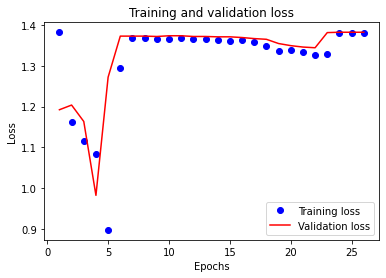

In [78]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) +1 )

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# r is for "solid red line"
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

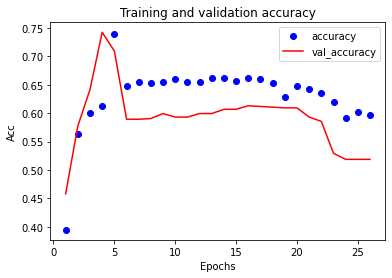

In [79]:
plt.plot(epochs, acc, 'bo', label='accuracy')
plt.plot(epochs, val_acc, 'r', label='val_accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()